In [38]:
using Plots
using LinearAlgebra

In [45]:
# Considering boolean inputs of dimension 2

X = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
Y = [1, 1, 1, 0]
 
n = length(X)                                            # Number of datapoints
d = length(first(X))                                     # Dimension of datapoints

2

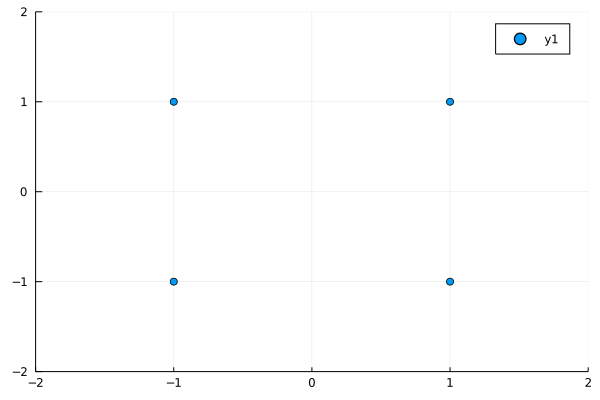

In [46]:
scatter(first.(X), last.(X), xlim=(-2, 2), ylim=(-2, 2))

In [47]:
# Hardcoding Layer 1

n1 = 4                                                   # Number of perceptrons in layer 1
θ1 = [-2,-2, -2, -2]                                     # Thresholds of the perceptrons in layer 1
w1 = [[-1, -1], [-1, 1], [1, -1], [1, 1]]                # Weights of both dimensions of a input for the perceptrons

h = []                                                   # Output of the perceptrons for each input

#--------------------------------------------------------------------------------------------------------------------
# Getting outputs of layer 1

for _x in X
    y = []
    for i in 1:n1
        x = copy(_x)
        w = copy(w1[i])
        if dot(append!(x, 1), append!(w, θ1[i])) >= 0
            push!(y, 1)
        else
            push!(y, 0)
        end
    end
    push!(h, y)
end

println(h)

Any[Any[1, 0, 0, 0], Any[0, 1, 0, 0], Any[0, 0, 1, 0], Any[0, 0, 0, 1]]


In [48]:
# Second layer pre-processing

class_0 = []
class_1 = []

for i in 1:n
   if Y[i] == 0
        push!(class_0, h[i])
    else
        push!(class_1, h[i])
    end
end

println(class_0)

Any[Any[0, 0, 0, 1]]


In [49]:
# Training Layer 2

n2 = 1                                                   # Number of perceptrons in layer 1
θ2 = rand()                                              # Random initialization of threshold
w2 = [rand() for _ in 1:2^d]

converged = false

while !converged
   converged = true
    
    for _x in class_0
        x = copy(_x)
        w = copy(w2)
        if dot(append!(w, θ2), append!(x, 1)) >= 0
            w2 -= _x
            converged = false
            break
        end
    end
    
    if converged
        for _x in class_1
            x = copy(_x)
            w = copy(w2)
            if dot(append!(w, θ2), append!(x, 1)) < 0
                w2 += _x
                converged = true
                break
            end
        end
    end
end

println(w2)

[0.8582317601120992, 0.5563903658951159, 0.2902271773946401, -0.9038489299838313]
